In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/paulsalgo/Desktop/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')


/var/folders/2b/qtjlkqbd0j39h89tsdkzddrc0000gn/T/ipykernel_72235/1006301288.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/paulsalgo/Desktop/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')


In [3]:
#Vehicle Type
vehicle_counts = data['VEHICLE TYPE CODE 1'].value_counts()
print(vehicle_counts)


Sedan                                  557468
Station Wagon/Sport Utility Vehicle    438724
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    50350
                                        ...  
Mini Van                                    1
50cc Scoot                                  1
Dodge                                       1
.                                           1
AMBALANCE                                   1
Name: VEHICLE TYPE CODE 1, Length: 1578, dtype: int64


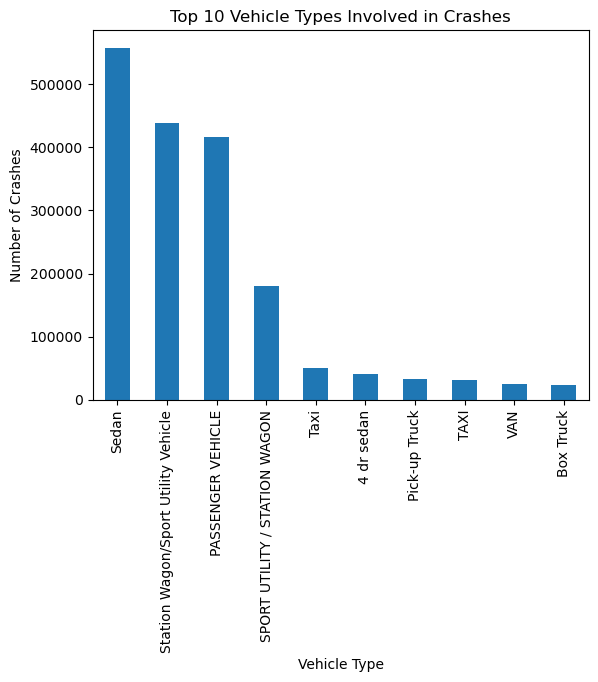

In [4]:
vehicle_counts.head(10).plot(kind='bar')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.title('Top 10 Vehicle Types Involved in Crashes')
plt.show()


In [5]:
# Create a DataFrame with "Vehicle Type" and "Contributing Factor Vehicle 1"
vehicle_contributing = data[['VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']]


In [6]:
# Filter out rows where "Contributing Factor Vehicle 1" is "Unspecified"
filtered_vehicle_contributing = vehicle_contributing[vehicle_contributing['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Count the occurrences of each combination
combination_counts = filtered_vehicle_contributing.groupby(['VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Count and display the top combinations
top_combinations = combination_counts.sort_values(by='Count', ascending=False).head(10)
print(top_combinations)

                      VEHICLE TYPE CODE 1   CONTRIBUTING FACTOR VEHICLE 1  \
3519                                Sedan  Driver Inattention/Distraction   
3633  Station Wagon/Sport Utility Vehicle  Driver Inattention/Distraction   
2725                    PASSENGER VEHICLE  Driver Inattention/Distraction   
3528                                Sedan           Following Too Closely   
3642  Station Wagon/Sport Utility Vehicle           Following Too Closely   
3525                                Sedan   Failure to Yield Right-of-Way   
3639  Station Wagon/Sport Utility Vehicle   Failure to Yield Right-of-Way   
2730                    PASSENGER VEHICLE                 Fatigued/Drowsy   
3362        SPORT UTILITY / STATION WAGON  Driver Inattention/Distraction   
3544                                Sedan  Passing or Lane Usage Improper   

       Count  
3519  135028  
3633  110204  
2725   50219  
3528   46819  
3642   42145  
3525   37317  
3639   31799  
2730   24321  
3362   23819  
35

In [7]:
# Filter out rows where "Contributing Factor Vehicle 1" is "Unspecified"
filtered_vehicle_contributing = vehicle_contributing[vehicle_contributing['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Count the occurrences of each combination
combination_counts = filtered_vehicle_contributing.groupby(['VEHICLE TYPE CODE 1', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Find the vehicle type with the highest count
most_common_vehicle = combination_counts.sort_values(by='Count', ascending=False).iloc[0]['VEHICLE TYPE CODE 1']

# Filter the combinations for the most common vehicle type
most_common_vehicle_combinations = combination_counts[combination_counts['VEHICLE TYPE CODE 1'] == most_common_vehicle]

# Display the most associated contributing factors for the most common vehicle type
top_contributing_factors = most_common_vehicle_combinations.sort_values(by='Count', ascending=False).head(10)
print(f"Most common vehicle type: {most_common_vehicle}")
print(top_contributing_factors)

Most common vehicle type: Sedan
     VEHICLE TYPE CODE 1   CONTRIBUTING FACTOR VEHICLE 1   Count
3519               Sedan  Driver Inattention/Distraction  135028
3528               Sedan           Following Too Closely   46819
3525               Sedan   Failure to Yield Right-of-Way   37317
3544               Sedan  Passing or Lane Usage Improper   23027
3515               Sedan                Backing Unsafely   22834
3543               Sedan             Passing Too Closely   19103
3561               Sedan            Unsafe Lane Changing   17110
3539               Sedan                 Other Vehicular   15971
3562               Sedan                    Unsafe Speed   14033
3560               Sedan              Turning Improperly   12822


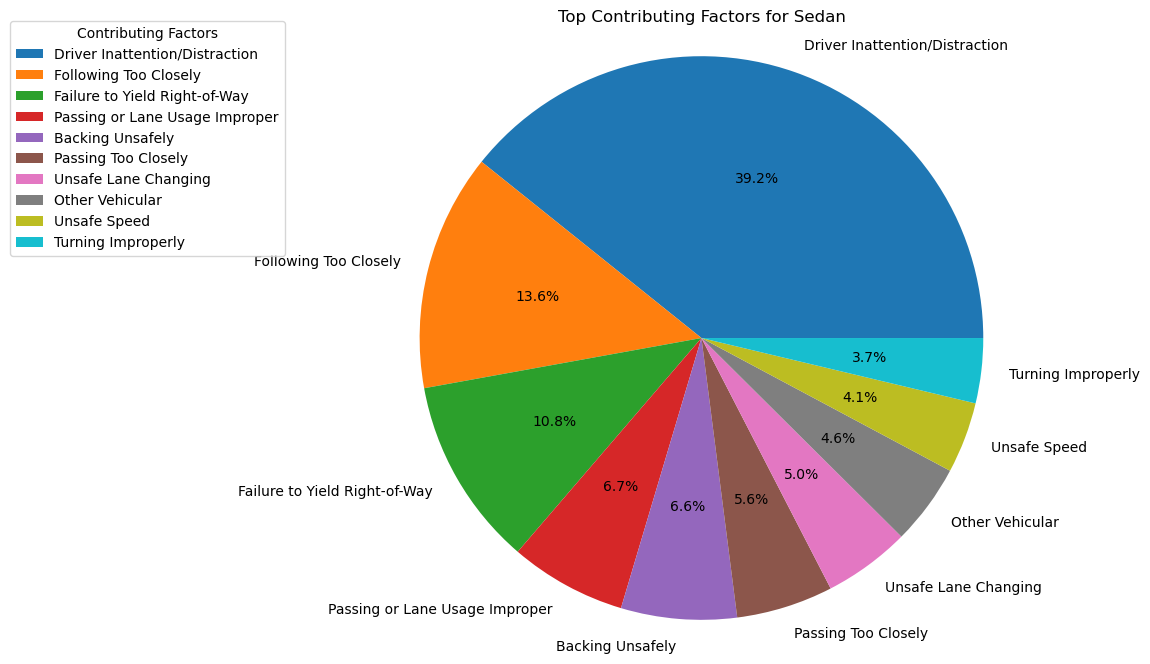

In [8]:
# Create a pie chart for the top contributing factors
plt.figure(figsize=(8, 8))
plt.pie(top_contributing_factors['Count'], labels=top_contributing_factors['CONTRIBUTING FACTOR VEHICLE 1'], autopct='%1.1f%%')
plt.title(f'Top Contributing Factors for {most_common_vehicle}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Add a legend
plt.legend(top_contributing_factors['CONTRIBUTING FACTOR VEHICLE 1'], title="Contributing Factors", bbox_to_anchor=(0, 0.9), bbox_transform=plt.gcf().transFigure)

plt.show()

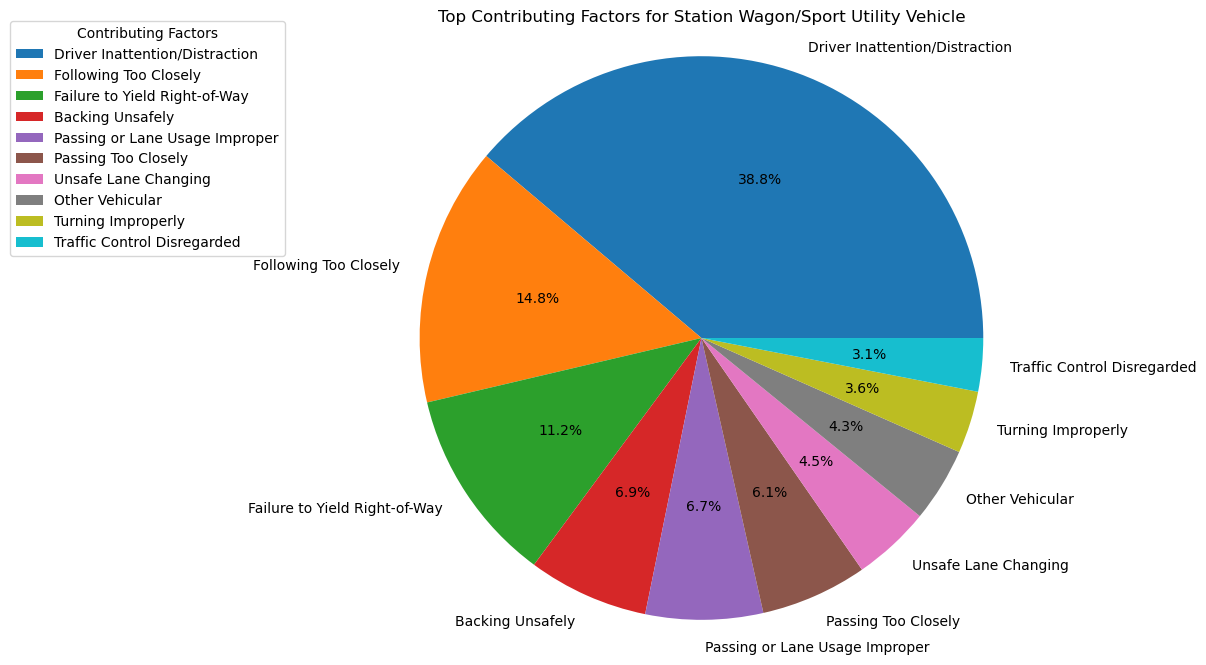

In [9]:
# Find the vehicle type with the second-highest count
most_common_vehicle = combination_counts.sort_values(by='Count', ascending=False).iloc[1]['VEHICLE TYPE CODE 1']

# Filter the combinations for the second most common vehicle type
second_most_common_vehicle_combinations = combination_counts[combination_counts['VEHICLE TYPE CODE 1'] == most_common_vehicle]

# Display the top contributing factors for the second most common vehicle type
top_contributing_factors = second_most_common_vehicle_combinations.sort_values(by='Count', ascending=False).head(10)

# Create a pie chart for the top contributing factors
plt.figure(figsize=(8, 8))
plt.pie(top_contributing_factors['Count'], labels=top_contributing_factors['CONTRIBUTING FACTOR VEHICLE 1'], autopct='%1.1f%%')
plt.title(f'Top Contributing Factors for {most_common_vehicle}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(top_contributing_factors['CONTRIBUTING FACTOR VEHICLE 1'], title="Contributing Factors", bbox_to_anchor=(0, 0.9), bbox_transform=plt.gcf().transFigure)

plt.show()

/var/folders/2b/qtjlkqbd0j39h89tsdkzddrc0000gn/T/ipykernel_72235/1184302116.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sedan_accidents.loc[:, 'CRASH DATE'] = pd.to_datetime(sedan_accidents['CRASH DATE'])


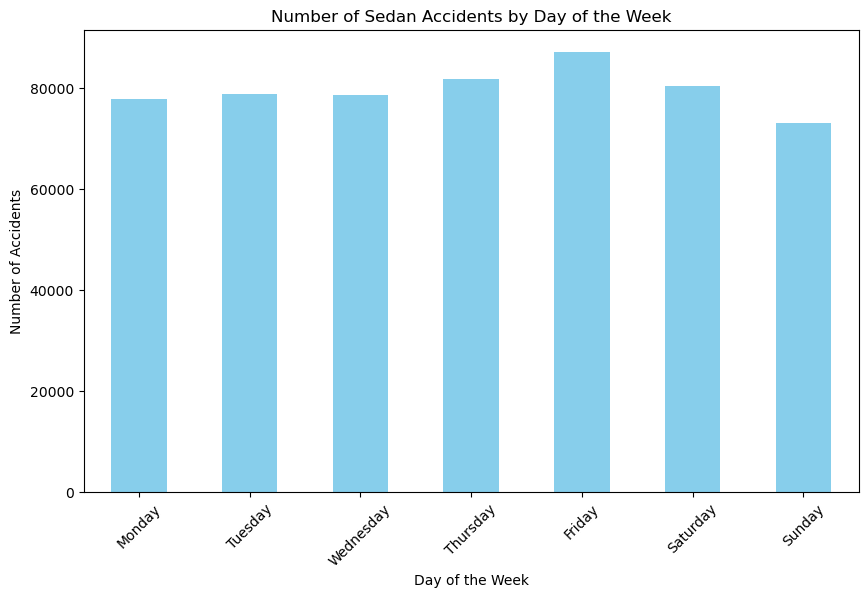

In [10]:

# Filter rows where the vehicle type is "Sedan"
sedan_accidents = data[data['VEHICLE TYPE CODE 1'] == 'Sedan'].copy()

# Convert the "CRASH DATE" column to a datetime format using .loc
sedan_accidents.loc[:, 'CRASH DATE'] = pd.to_datetime(sedan_accidents['CRASH DATE'])

# Extract the day of the week from the "CRASH DATE" column using .loc
sedan_accidents.loc[:, 'Day of the Week'] = sedan_accidents['CRASH DATE'].dt.day_name()

# Count the number of accidents by day of the week
accidents_by_day = sedan_accidents['Day of the Week'].value_counts()

# Sort the days of the week in the correct order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day = accidents_by_day.reindex(days_of_week)

# Create a bar chart to visualize the accidents by day of the week
plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Sedan Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

/var/folders/2b/qtjlkqbd0j39h89tsdkzddrc0000gn/T/ipykernel_72235/609716426.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  suv_accidents.loc[:, 'CRASH DATE'] = pd.to_datetime(suv_accidents['CRASH DATE'])


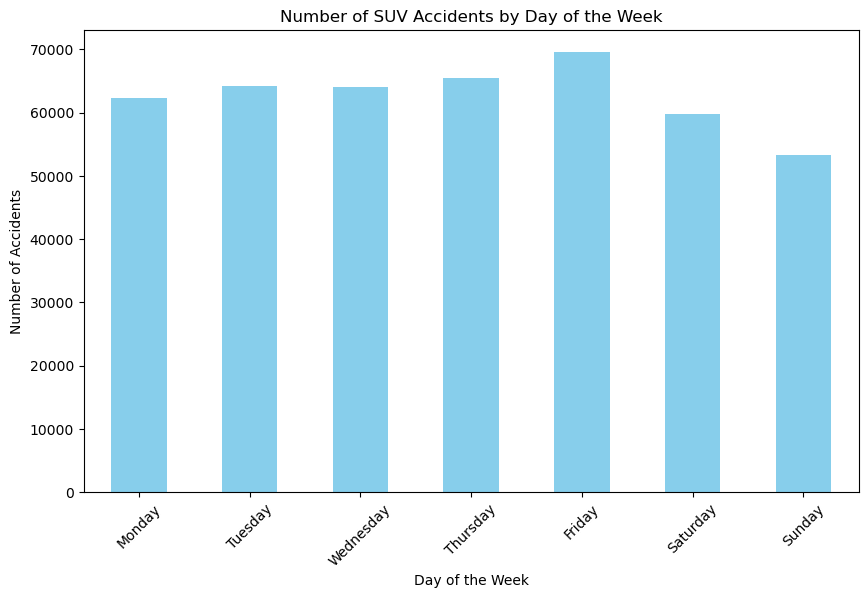

In [11]:
# Filter rows where the vehicle type is "Station Wagon/Sport Utility Vehicle"
suv_accidents = data[data['VEHICLE TYPE CODE 1'] == 'Station Wagon/Sport Utility Vehicle'].copy()

# Convert the "CRASH DATE" column to a datetime format using .loc
suv_accidents.loc[:, 'CRASH DATE'] = pd.to_datetime(suv_accidents['CRASH DATE'])

# Extract the day of the week from the "CRASH DATE" column using .loc
suv_accidents.loc[:, 'Day of the Week'] = suv_accidents['CRASH DATE'].dt.day_name()

# Count the number of accidents by day of the week
accidents_by_day = suv_accidents['Day of the Week'].value_counts()

# Sort the days of the week in the correct order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day = accidents_by_day.reindex(days_of_week)

# Create a bar chart to visualize the accidents by day of the week
plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of SUV Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()